In [75]:
import yfinance as yf

In [76]:
sp=yf.Ticker("AAPL")

In [77]:
sp=sp.history(period="max")

In [78]:
sp

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099450,0.099882,0.099450,0.099450,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.094694,0.094694,0.094261,0.094261,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.087775,0.087775,0.087343,0.087343,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.089504,0.089937,0.089504,0.089504,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.092099,0.092532,0.092099,0.092099,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2023-09-05 00:00:00-04:00,188.279999,189.979996,187.610001,189.699997,45280000,0.0,0.0
2023-09-06 00:00:00-04:00,188.399994,188.850006,181.470001,182.910004,81755800,0.0,0.0
2023-09-07 00:00:00-04:00,175.179993,178.210007,173.539993,177.559998,112488800,0.0,0.0


In [79]:
sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10776 entries, 1980-12-12 00:00:00-05:00 to 2023-09-11 00:00:00-04:00
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          10776 non-null  float64
 1   High          10776 non-null  float64
 2   Low           10776 non-null  float64
 3   Close         10776 non-null  float64
 4   Volume        10776 non-null  int64  
 5   Dividends     10776 non-null  float64
 6   Stock Splits  10776 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 673.5 KB


<Axes: xlabel='Date'>

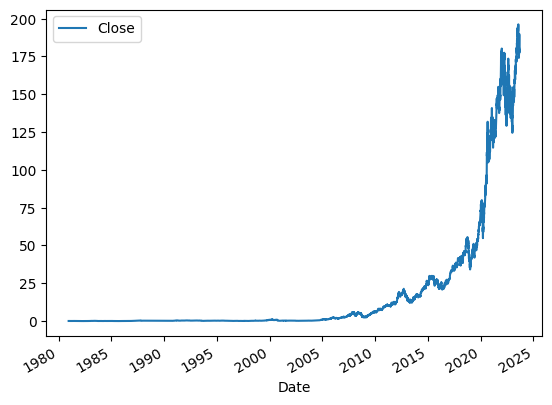

In [80]:
sp.plot.line(y='Close',use_index=True)

In [81]:
sp=sp.drop(labels=['Dividends','Stock Splits'],axis=1)

In [89]:
sp['Tomorrow']=sp['Close'].shift(-1)
sp.head()

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,0.249599,0.265531,0.247829,0.263761,183198400,0.265531,1
1990-01-03 00:00:00-05:00,0.269072,0.269072,0.265531,0.265531,207995200,0.266417,1
1990-01-04 00:00:00-05:00,0.270842,0.274382,0.263761,0.266417,221513600,0.267302,1
1990-01-05 00:00:00-05:00,0.267302,0.270842,0.261990,0.267302,123312000,0.269072,1
1990-01-08 00:00:00-05:00,0.265531,0.269072,0.261990,0.269072,101572800,0.266417,0


In [83]:
lst=[]
tomorrow=sp['Tomorrow']
close=sp['Close']
for i in range(len(tomorrow)):
  if tomorrow[i]>close[i]:
    lst.append(1)
  else:
    lst.append(0)
sp['Target']=lst
sp.head(10)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.099450,0.099882,0.099450,0.099450,469033600,0.094261,0
1980-12-15 00:00:00-05:00,0.094694,0.094694,0.094261,0.094261,175884800,0.087343,0
1980-12-16 00:00:00-05:00,0.087775,0.087775,0.087343,0.087343,105728000,0.089504,1
1980-12-17 00:00:00-05:00,0.089504,0.089937,0.089504,0.089504,86441600,0.092099,1
1980-12-18 00:00:00-05:00,0.092099,0.092532,0.092099,0.092099,73449600,0.097720,1
1980-12-19 00:00:00-05:00,0.097720,0.098152,0.097720,0.097720,48630400,0.102476,1
1980-12-22 00:00:00-05:00,0.102476,0.102909,0.102476,0.102476,37363200,0.106800,1
1980-12-23 00:00:00-05:00,0.106800,0.107233,0.106800,0.106800,46950400,0.112421,1
1980-12-24 00:00:00-05:00,0.112421,0.112854,0.112421,0.112421,48003200,0.122799,1


In [84]:
sp=sp.loc['1990-01-01':]
sp.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8488 entries, 1990-01-02 00:00:00-05:00 to 2023-09-11 00:00:00-04:00
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      8488 non-null   float64
 1   High      8488 non-null   float64
 2   Low       8488 non-null   float64
 3   Close     8488 non-null   float64
 4   Volume    8488 non-null   int64  
 5   Tomorrow  8487 non-null   float64
 6   Target    8488 non-null   int64  
dtypes: float64(5), int64(2)
memory usage: 530.5 KB


In [85]:
train=sp.iloc[:-100]
test=sp.iloc[-100:]
pred=['Close','Volume','Open','High','Low']

In [86]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.metrics import precision_score as pre

model=RandomForestClassifier(n_estimators=100,min_samples_split=100,random_state=1)
model.fit(train[pred],train['Target'])
preds=model.predict(test[pred])
preds=pd.Series(preds,index=test.index)
pre(test['Target'],preds)

0.7142857142857143

In [87]:
import warnings
warnings.filterwarnings('ignore')

In [88]:
new_prediction=model.predict([[189.699997,45280000,188.279999,	189.979996,187.610001]])
if new_prediction==0:
  print("stock DECREASES for this input sample")
else:
  print("stock INCREASES for this input sample")

stock DECREASES for this input sample
